# Introduction to statistical testing

This afternoon we will focus on the application of Student and Welsh's test on Pauline epistles, in order to assess possible different use of conjunctions that would indicate a **different authorship** between the epistle to the Colossians and "authentic" epistles.

Requirements for the lab that you should have installed in your virtual environment:
- `scipy`
- `pandas`
- `scikit-learn`
- `seaborn`

## Data pre-processing

In the dataset `pauline.csv` you will find a three columns dataset containing the **lemmatized** text of the authentic epistles and Colossians split over a 50 tokens frequency. The dataset has three columns: `book`, `chunk` (corresponds to the 50 tokens text chunk), and `text`.

The goal of the pre-processing is now to structure the dataset in order to have the following column:
`book`, `chunk` (corresponds to the 50 tokens text chunk) and `functional_words_frequency`.

The list of words that can be considered to be functional words is stored in the list `STOP_WORDS`:

In [2]:
STOP_WORDS = set([
    "ἄλλος", "ἄν", "ἄρα", "ἀλλ'", "ἀλλά", "ἀπό", "αὐτός", "δ'", "δαί", "δαίς", "δέ", "δή",
    "διά", "ἑαυτοῦ", "ἔτι", "ἐάν", "ἐγώ", "ἐκ", "ἐμός", "ἐν", "ἐπί", "εἰ", "εἰμί", "εἶμι",
    "εἰς", "γάρ", "γὰ", "γε", "ἡ", "ἦ", "καί", "κατά", "μέν", "μετά", "μή", "ὁ", "ὅδε",
    "ὅς", "ὅστις", "ὅτι", "οἱ", "οὕτως", "οὗτος", "οὐ", "οὔτε", "οὖν", "οὐδέ", "οὐδείς",
    "οὐκ", "παρά", "περί", "πρός", "σός", "σύ", "σύν", "τά", "τε", "τήν", "τῆς", "τῇ",
    "τί", "τί", "τίς", "τις", "τό", "τόν", "τοί", "τοιοῦτος", "τούς", "τοῦ", "τῶν", "τῷ",
    "ὑμός", "ὑπέρ", "ὑπό", "ὥστε", "ὡς", "ὦ"
])

**Exercice**:
1. Load the dataset in `pauline.csv` into a pandas DataFrame `pauline`.
2. Compute on the column `text` the word counts of the words contained in the list `STOP_WORDS` (hint: use the parameter `vocabulary` of the class `CountVectorizer` that we used on Day 3).
3. Sum these words frequencies in order to have the global functional word frequencies and store them into a variable containing numpy arrays `word_freq`. 
4. Using the method `assign`, add a new column `functional_freq` to the DataFrame `pauline`.

In [63]:
### Do not forget to do the imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Question 1.
pauline = pd.read_csv("data/pauline.csv")

# Question 2.
vectorizer = CountVectorizer(vocabulary=STOP_WORDS)

# Compute the frequency
X = vectorizer.fit_transform(pauline["text"])

# Question 3.
# Sum the frequency and divide by the number of token per chunk
word_freq = X.sum(axis=1)/50

# Quetion 4.
pauline = pauline.assign(functional_freq=[freq[0] for freq in word_freq.tolist()])

## Data analysis

Before performing statistical tests, we can check visually and statistically the distribution of the data, using the skills that we developed during day 2.

**Exercice**:
1. Using `pandas` filter, create a new variable called `is_col`, that equals to 1 if the chunk corresponds to the book `Col` and 0 otherwise.
2. Assign using the method `assign`, add this new variable to the dataset `pauline` (you can for example call it `is_col`).
3. Give the major statistical estimators (mean, median, standard error) for functional word frequencies across Colossians and the authentic epistles.
4. Plot the distribution of functional word frequencies across Colossians and the authentic epistles using the adequate graph for this data type.

<Axes: xlabel='is_col', ylabel='functional_freq'>

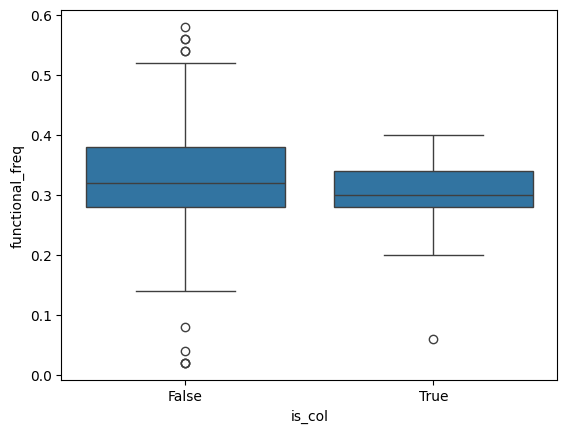

In [64]:
# Question 1.
is_col = pauline["book"] == "Col"

# Question 2.
pauline = pauline.assign(is_col=is_col)

# Question 3.
pauline.groupby("is_col").describe()["functional_freq"]

# Question 4.
import seaborn as sns

sns.boxplot(x="is_col", y="functional_freq", data=pauline)

## Performing statistical tests 

Student tests are available in `scipy` using the `ttest_ind` from the module `stats`.

In [65]:
from scipy.stats import ttest_ind

It provides several options (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind), the most important for us being the `equal_var` parameter, that when sets to `True` performs a standard Student test and set to `False` a Welsch test. In this lab, we will go for the Welsch test as we detailed it lecture.
It outputs the `t_stat` as well as the `p_val`.

In [66]:
# Example using randomly generated artificial samples
import numpy as np

# Generate two samples to test
sample_1 = np.random.normal(0, 1, 1000)
sample_2 = np.random.normal(1, 1, 1000)

# Perform the t-test
t_stat, p_val = ttest_ind(sample_1, sample_2)

# Can you conclude regarding a different distribution ?

**Exercice**
1. Using this new variable `is_col`, extract as two `numpy` arrays the frequencies for the epistle of the Colossian and for the authentic epistles (using the attribute `.values` of pandas Series).
2. Perform the Student's test on the two arrays.
3. Conclude regarding different use of functional words in Colossian and authentic episles.
4. **Bonus**: Test the normality hypothesis using Shapiro's test (`scipy.stats.shapiro`). The H_0 hypothesis corresponds to sample normality.


In [67]:
# Question 1.
col = pauline[pauline["book"] == "Col"]["functional_freq"].values
authentics = pauline[pauline["book"] != "Col"]["functional_freq"].values

# Question 2.
t_stat, p_val = ttest_ind(col, authentics, equal_var=False)

print(f"p-value for test: {p_val}")

# Question 3.
# We can reject the null hypothesis that the two samples have the same mean at a 5% significance level :-)

# Question 4.
from scipy.stats import shapiro
# Test the normality of the samples using shapiro
print("Shapiro for Col: ", shapiro(col).pvalue)
print("Shapiro for authentics: ", shapiro(authentics).pvalue)

# Samples are not normal !

p-value for test: 0.014211552020947074
Shapiro for Col:  0.0007105700646896576
Shapiro for authentics:  5.229309813466903e-07


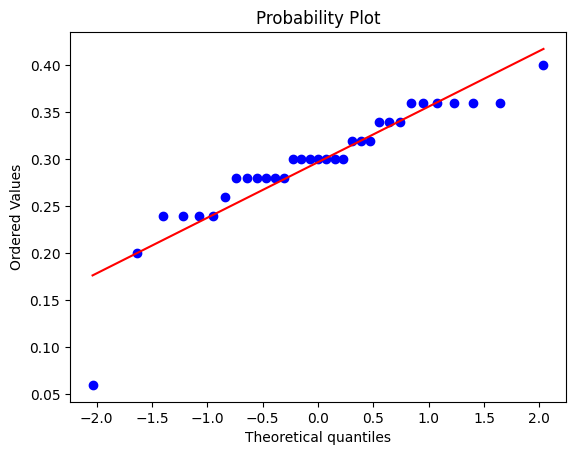

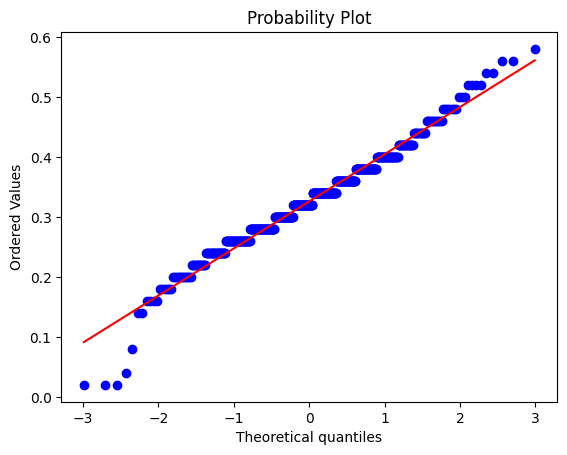

In [70]:
# Other possible approach is the plot of qq-plot

from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(col, dist="norm", plot=plt)
plt.show()
probplot(authentics, dist="norm", plot=plt)
plt.show()

### Bonus: linear regression and statistical testing 

In the study suggested by Jermo, he performs a linear regression using the frequency of a set of feature of the text and compute the **prediction interval** for Colossian. He then uses this prediction interval to conclude regarding the deviation of Colossians to the authentic letters.

As this consists in building a more complicated model, we will have to rely on the package `statsmodel`, that provides in Python an easy API to build models.

For this lab demonstration purpose, **we will use the number of tokens as input and the number of functional rate as the predicted response** (see slides for a more theoretical approach).

##### Data preparation

Data preparation consists in counting the number of functional words and the number of tokens.
We need to create a DataFrame with a column `number_functional` and `number_tokens`.

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

pauline = pd.read_csv("data/pauline.csv")

# Concatenate together text to have the full epistle
pauline = pauline.groupby("book").agg({"text": " ".join}).reset_index()

vectorizer = CountVectorizer(vocabulary=STOP_WORDS)

X = vectorizer.fit_transform(pauline["text"])

word_freq = X.sum(axis=1)


pauline = pauline.assign(number_functional=[freq[0] for freq in word_freq.tolist()])
pauline = pauline.assign(number_tokens = pauline.text.apply(lambda x: len(x.split())))

# Separate authentic from Colossians
pauline_col = pauline[pauline["book"] == "Col"]
pauline_authentics = pauline[pauline["book"] != "Col"]

##### Model fitting

In [35]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols("number_functional ~ 1 + number_tokens", data=pauline_authentics)

results = model.fit()

##### Model evaluation
Model evaluation happens in two steps:
- Check goodness of fit indicator (MSE and R-squared)
- Check model assumption by the examination of residuals

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      number_functional   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2867.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           4.30e-08
Time:                        11:16:01   Log-Likelihood:                -34.822
No. Observations:                   7   AIC:                             73.64
Df Residuals:                       5   BIC:                             73.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.0374     26.515      0.454

/Users/sophrobhayek/Documents/dev/statistical_tests/venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [37]:
# Get the RMSE
sm.tools.eval_measures.rmse(results.predict(pauline_authentics), pauline_authentics["number_functional"])

np.float64(35.008747745015974)

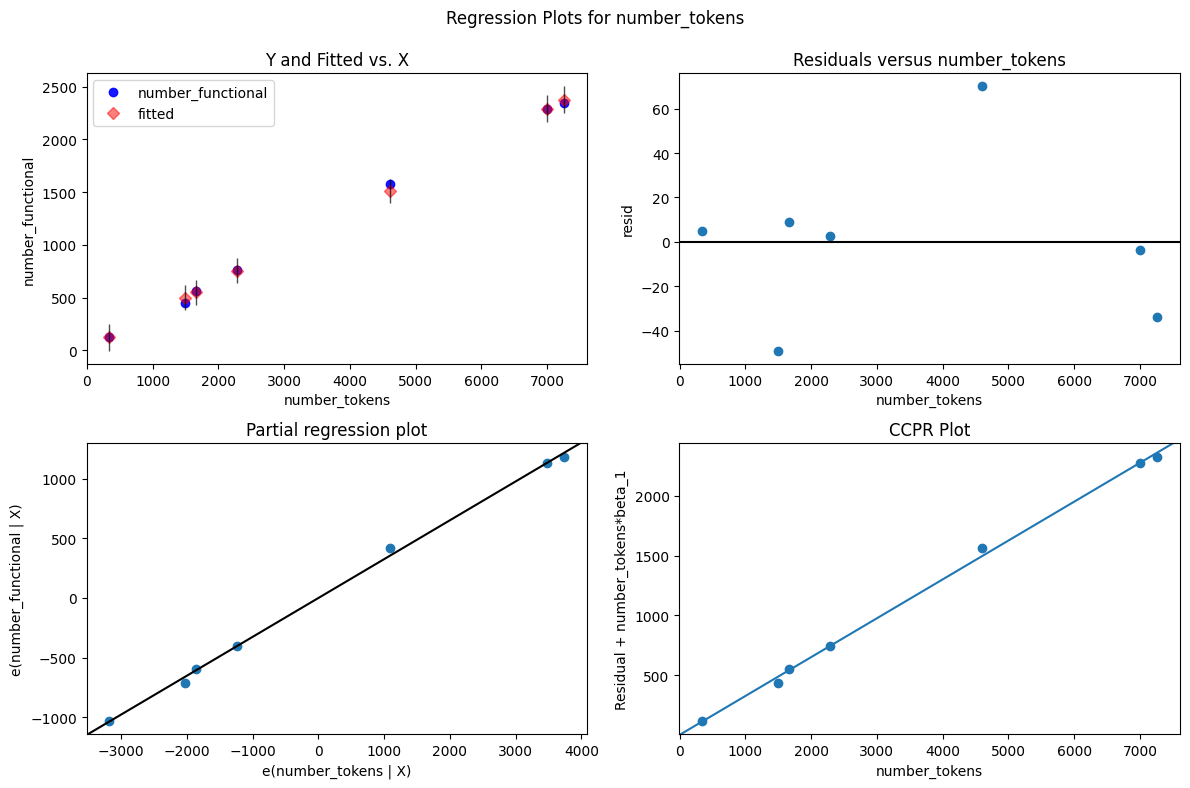

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(results, "number_tokens", fig=fig)

#### Prediction interval for Colossian

In [40]:
predictions = results.get_prediction(pauline_col)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,536.366425,19.489493,486.267089,586.465762,418.688296,654.044554


In [41]:
pauline_col

,book,text,number_functional,number_tokens
3,Col,παῦλος ἀπόστολος ⸂Χριστός Ἰησοῦ⸃ διά θέλημα θε...,490,1612


Here we can see that the prediction interval is [418.69, 654.04], with a measured value of 490 for Colossians, **which puts it within the prediction interval**.

**Super bonus exercise**: do the same with chunks of the dataset in order to see if there are variations.

#### Under the hood data pre-processing

In case you want to add more epistles !

In [30]:
import pathlib
import pandas as pd
import json
import string
sub_df = []


CHUNK_SIZE = 50


def chunklist(string_list, chunk_size):
  return [string_list[i:i+chunk_size] for i in range(0, len(string_list), chunk_size)]


for file in pathlib.Path("data/raw/").glob("*.json"):
    with open(file) as f:
        bookname = file.stem
        raw_text = json.load(f)
        
        full_text = []
        for chap, text in raw_text.items():
            for ix, token in enumerate(text):
                if token["lemma"] not in string.punctuation:
                    full_text.append(token["lemma"])
        chunks = chunklist(full_text, CHUNK_SIZE)
        for ix, chunk in enumerate(chunks):
            sub_df.append({"book": bookname, "chunk": ix+1, "text": " ".join(chunk)})

pd.DataFrame(sub_df).to_csv("data/pauline.csv", index=False)